Feature Engineering
===

Extract features from data
1. Calculated uncertainty
2. Extracted Weekends and Rush Hours
3. Save df as df-features.p

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

sns.set_style('white')

df = pd.read_pickle('all-df.p')

In [2]:
df.shape

(893, 198)

In [3]:
df.head()

,A-1-E-T-TF_Max,A-1-E-T-TF_Min,A-1-E-T-TF_RMS,A-10-E-TW-SF_Max,A-10-E-TW-SF_Min,A-10-E-TW-SF_RMS,A-2-E-T-TF_Max,A-2-E-T-TF_Min,A-2-E-T-TF_RMS,A-3-E-T-TF_Max,...,T-10-E-TW-SF_Min,T-10-E-TW-WB_Average,T-10-E-TW-WB_Max,T-10-E-TW-WB_Min,T-9-E-TW-SF_Average,T-9-E-TW-SF_Max,T-9-E-TW-SF_Min,T-9-E-TW-WB_Average,T-9-E-TW-WB_Max,T-9-E-TW-WB_Min
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-05 08:31:40,0.001316,-0.009395,0.002835,0.002083,-0.005025,0.001387,0.006612,-0.008061,0.000974,0.003837,...,-0.017990,0.128397,0.269324,-0.016863,0.036715,0.166163,-0.090434,0.033246,0.095981,-0.047871
2017-07-05 08:41:40,-0.000422,-0.005926,0.003175,0.000680,-0.003236,0.001452,0.003827,-0.005288,0.001036,0.002867,...,-0.002721,0.128355,0.194187,0.057718,0.036686,0.149379,-0.080413,0.031260,0.079964,-0.018961
2017-07-05 08:51:40,-0.001178,-0.006039,0.003501,0.007270,-0.012717,0.001779,0.006003,-0.007743,0.001243,0.007602,...,-0.245234,0.135325,0.587950,-0.379729,0.035531,0.161752,-0.063730,0.029892,0.484039,-0.422958
2017-07-05 09:01:40,0.000794,-0.008740,0.003870,0.002612,-0.004680,0.001660,0.005343,-0.006587,0.001417,0.005351,...,-0.025048,0.148715,0.333798,0.007433,0.037100,0.143737,-0.076553,0.029019,0.105358,-0.047494
2017-07-05 09:11:40,0.001489,-0.009407,0.004278,0.002304,-0.005447,0.001700,0.006381,-0.009642,0.001682,0.012568,...,-0.008550,0.158631,0.297861,-0.025897,0.039205,0.198259,-0.106905,0.030323,0.123140,-0.072853


### New Columns: Uncertainty
Format: Column_Name + _Uncertainty

#### Add columns for Uncertainty(fluctuation)

In [4]:
# Find all sensor names

import re
regex = '(.+)_'  # Find sensor names
matches = []
for col in df.columns:
    matches.append(re.findall(regex, col))

# remove duplicates

col_names = []

for i in matches:
    if i not in col_names:
        col_names.append(i)

In [5]:
# Assume Fluctuation = abs(Max) + abs(Min) (Note: not +- but a range instead)
# Need to ask/fix
# Bad coding :(

for i in range(len(col_names)):
    col_min = col_names[i][0] + '_Min'
    col_max = col_names[i][0] + '_Max'
    col_rms = col_names[i][0] + '_RMS'
    col_avg = col_names[i][0] + '_Average'
    try:
        df[col_names[i][0] + '_Uncertainty'] = abs(df[col_max]-df[col_rms]) + abs(df[col_min]-df[col_rms])
    except:
        df[col_names[i][0] + '_Uncertainty'] = abs(df[col_max]-df[col_avg]) + abs(df[col_min]-df[col_avg])

### New Columns: Weekday
Format: Weekday(1-7)

In [6]:
# 1 to 5 as Mon to Fri
# 6 and 7 as Sat and Sun
df['Weekday'] = df.index.weekday + 1

In [7]:
# Three rows with null date
# Why???

df[df['Weekday'].isnull()]

,A-1-E-T-TF_Max,A-1-E-T-TF_Min,A-1-E-T-TF_RMS,A-10-E-TW-SF_Max,A-10-E-TW-SF_Min,A-10-E-TW-SF_RMS,A-2-E-T-TF_Max,A-2-E-T-TF_Min,A-2-E-T-TF_RMS,A-3-E-T-TF_Max,...,SG-9-E-R-A-H_Uncertainty,SG-9-E-R-A-V_Uncertainty,SG-9-E-R-B-D_Uncertainty,SG-9-E-R-B-H_Uncertainty,SG-9-E-R-B-V_Uncertainty,T-10-E-TW-SF_Uncertainty,T-10-E-TW-WB_Uncertainty,T-9-E-TW-SF_Uncertainty,T-9-E-TW-WB_Uncertainty,Weekday
Time,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.063232,1.098709,1.023254,1.494293,1.258751,0.023947,0.068740,0.020544,0.027272,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.071960,1.120407,1.145233,1.594513,1.071457,0.015447,0.024495,0.013647,0.016427,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180420,1.103088,1.293243,1.603180,1.045326,0.006657,0.007389,0.005610,0.006284,NaN


In [8]:
# Drop null date

df = df.dropna(subset=['Weekday'])

df['Weekday'] = df['Weekday'].astype(int)

### New col: is_Weekend
Format: is_Weekend (0 or 1)

In [10]:
def is_weekend(day):
    if day > 0 and day < 6:
        return 0
    else:
        return 1
    
df['is_Weekend'] = df['Weekday'].apply(is_weekend)

### New col: is_Rush_Hour
Format: is_Rush_Hour (0 or 1)

[GeoStat](http://www.geostat.org/data/portsmouth-nh/commute)
From 7 to 9am, estimate 5 to 7pm

Rush Hour: not weekend and from 0700 to 0900 and 1700 to 1900

In [12]:
# Extract time(hour) from index
df['Hour'] = df.index.hour

In [13]:
len(df['Hour'].value_counts())

24

In [14]:
def is_rush_hour(hour, is_weekend):
    
    def rush_hour(hour):
        if (hour > 6 and hour < 9) or (hour > 16 and hour < 19):
            return 1
        else:
            return 0
    
    if not is_weekend:
        if rush_hour(hour):
            return 1
        else:
            return 0
    else:
        return 0

In [15]:
df['is_Rush_Hour'] = df[['Hour', 'is_Weekend']].apply(lambda x: is_rush_hour(*x), axis=1)

In [16]:
df.corr()

,A-1-E-T-TF_Max,A-1-E-T-TF_Min,A-1-E-T-TF_RMS,A-10-E-TW-SF_Max,A-10-E-TW-SF_Min,A-10-E-TW-SF_RMS,A-2-E-T-TF_Max,A-2-E-T-TF_Min,A-2-E-T-TF_RMS,A-3-E-T-TF_Max,...,SG-9-E-R-B-H_Uncertainty,SG-9-E-R-B-V_Uncertainty,T-10-E-TW-SF_Uncertainty,T-10-E-TW-WB_Uncertainty,T-9-E-TW-SF_Uncertainty,T-9-E-TW-WB_Uncertainty,Weekday,is_Weekend,Hour,is_Rush_Hour
A-1-E-T-TF_Max,1.000000,0.545636,-0.834949,-0.074418,0.173391,-0.281627,0.016502,0.168358,-0.784264,0.036365,...,-0.076664,-0.071300,-0.135837,-0.137515,0.033724,-0.108867,0.388766,0.233237,-0.141175,-0.069037
A-1-E-T-TF_Min,0.545636,1.000000,-0.893725,-0.429825,0.516866,-0.382442,-0.034683,0.624000,-0.889281,-0.018206,...,-0.137737,-0.185047,-0.361024,-0.454105,-0.588200,-0.317079,0.284697,0.217539,-0.074563,-0.053028
A-1-E-T-TF_RMS,-0.834949,-0.893725,1.000000,0.307412,-0.413626,0.368516,0.008372,-0.472847,0.966396,-0.011375,...,0.119532,0.137180,0.294810,0.354998,0.352779,0.248897,-0.404865,-0.280408,0.077490,0.043998
A-10-E-TW-SF_Max,-0.074418,-0.429825,0.307412,1.000000,-0.926125,0.296137,0.078469,-0.529707,0.366858,0.081990,...,0.395813,0.525943,0.910602,0.978678,0.738767,0.911597,-0.026260,-0.067291,0.059626,0.047744
A-10-E-TW-SF_Min,0.173391,0.516866,-0.413626,-0.926125,1.000000,-0.518493,-0.073077,0.546710,-0.454442,-0.072642,...,-0.391274,-0.511328,-0.898724,-0.973153,-0.752932,-0.860502,0.131629,0.154730,-0.027216,-0.081305
A-10-E-TW-SF_RMS,-0.281627,-0.382442,0.368516,0.296137,-0.518493,1.000000,0.046857,-0.280443,0.338827,0.037114,...,0.147329,0.233157,0.341977,0.409918,0.326516,0.338112,-0.326247,-0.293140,-0.049313,0.092779
A-2-E-T-TF_Max,0.016502,-0.034683,0.008372,0.078469,-0.073077,0.046857,1.000000,-0.718631,0.184855,0.998947,...,0.032900,0.197990,0.093760,0.075304,0.084384,0.078475,0.058345,0.047459,0.008675,-0.009621
A-2-E-T-TF_Min,0.168358,0.624000,-0.472847,-0.529707,0.546710,-0.280443,-0.718631,1.000000,-0.620201,-0.711708,...,-0.174246,-0.344537,-0.467613,-0.529589,-0.631235,-0.444561,0.094134,0.090004,-0.042197,-0.014767
A-2-E-T-TF_RMS,-0.784264,-0.889281,0.966396,0.366858,-0.454442,0.338827,0.184855,-0.620201,1.000000,0.166716,...,0.146181,0.199402,0.346202,0.406040,0.404848,0.298051,-0.381047,-0.278724,0.110114,0.044327
A-3-E-T-TF_Max,0.036365,-0.018206,-0.011375,0.081990,-0.072642,0.037114,0.998947,-0.711708,0.166716,1.000000,...,0.033914,0.198456,0.093566,0.077413,0.075807,0.078349,0.068088,0.054131,0.002197,-0.012540


In [17]:
# Plot again - resample by hours
df_hour = df.resample('H').mean()

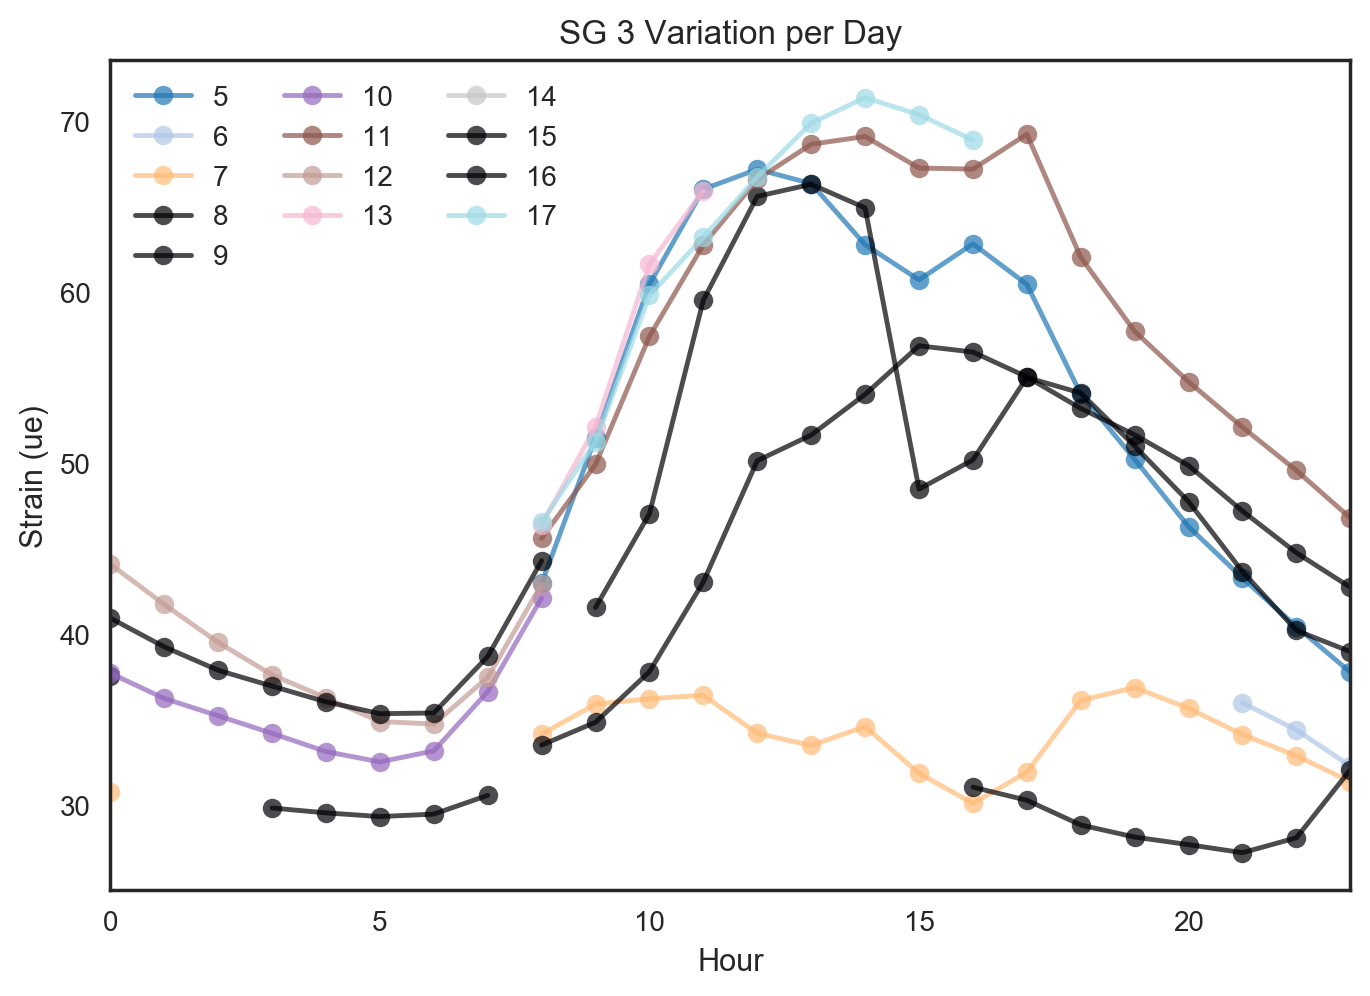

In [18]:
plt.figure(dpi=200)

# iterate colour
x = np.linspace(0, 1, 13)
cmap = plt.get_cmap('tab20')
cmap_weekend = plt.get_cmap('inferno')
i = 0

for day in list(df_hour.index.day.unique()):
    df = df_hour[df_hour.index.day == day]
    if df['is_Weekend'].median() == 1:
        color = cmap_weekend(x[0])
    else:
        color = cmap(x[i])
    
    plt.plot(df.index.hour, df['SG-3-E-R-A-D_Average'], '-o', color=color, label=day, alpha=0.7)
    i += 1
    
plt.legend(ncol=3)
title = 'SG 3 Variation per Day'
plt.title(title)
plt.xlabel('Hour')
plt.ylabel('Strain (ue)')
plt.xlim([0, 23])
plt.savefig(title)

In [20]:
# save df with features as df_feature.p
pd.to_pickle(df, 'df-features.p')